In [6]:
import rioxarray
import cf_xarray
import xarray as xr
import numpy as np
%matplotlib inline

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [7]:
ds = xr.open_dataset('MRMS_MergedReflectivityQCComposite_00.50_20220704-110040.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:                        (time: 1, lat: 3500, lon: 7000)
Coordinates:
  * time                           (time) datetime64[ns] 2022-07-04T07:00:40
  * lat                            (lat) float64 54.99 54.98 ... 20.01 20.0
  * lon                            (lon) float64 230.0 230.0 ... 300.0 300.0
Data variables:
    MergedReflectivityQCComposite  (time, lat, lon) float64 ...
Attributes:
    meta:     created with gribberish

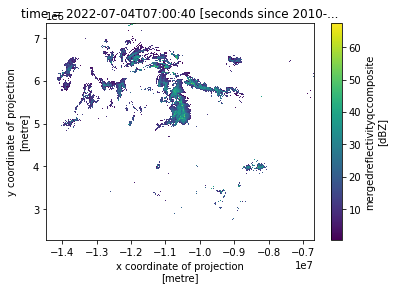

In [14]:
radar = ds['MergedReflectivityQCComposite']
radar = radar.where(radar > 0) 
radar = radar.rio.reproject('EPSG:3857')
radar.plot()